In [1]:
%load_ext tensorboard

In [2]:
import datetime, os
import tensorflow as tf

from pathlib import Path
from matplotlib import pyplot as plt
from quickdraw import QuickDrawDataGroup, QuickDrawData

from tensorflow.keras.preprocessing import image_dataset_from_directory

from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import sparse_categorical_accuracy
# from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.layers import Rescaling, Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization

from tensorflow.keras.callbacks import TensorBoard

In [3]:
image_size = (28, 28)

In [4]:
def generate_class_images(name, max_drawings, recognized):
    directory = Path("dataset/" + name)

    if not directory.exists():
        directory.mkdir(parents=True)

    images = QuickDrawDataGroup(name, max_drawings=max_drawings, recognized=recognized)
    for img in images.drawings:
        filename = directory.as_posix() + "/" + str(img.key_id) + ".png"
        img.get_image(stroke_width=3).resize(image_size).save(filename)

for label in QuickDrawData().drawing_names:
    generate_class_images(label, max_drawings=1200, recognized=True)

loading aircraft carrier drawings
load complete
loading airplane drawings
load complete
loading alarm clock drawings
load complete
loading ambulance drawings
load complete
downloading angel from https://storage.googleapis.com/quickdraw_dataset/full/binary/angel.bin
download complete
loading angel drawings
load complete
downloading animal migration from https://storage.googleapis.com/quickdraw_dataset/full/binary/animal migration.bin
download complete
loading animal migration drawings
load complete
downloading ant from https://storage.googleapis.com/quickdraw_dataset/full/binary/ant.bin
download complete
loading ant drawings
load complete
downloading anvil from https://storage.googleapis.com/quickdraw_dataset/full/binary/anvil.bin
download complete
loading anvil drawings
load complete
downloading apple from https://storage.googleapis.com/quickdraw_dataset/full/binary/apple.bin
download complete
loading apple drawings
load complete
downloading arm from https://storage.googleapis.com/quic

In [5]:
batch_size = 32

train_ds = image_dataset_from_directory(
    "dataset",
    validation_split=0.2,
    subset="training",
    seed=123,
    color_mode="grayscale",
    image_size=image_size,
    batch_size=batch_size
)

val_ds = image_dataset_from_directory(
    "dataset",
    validation_split=0.2,
    subset="validation",
    seed=123,
    color_mode="grayscale",
    image_size=image_size,
    batch_size=batch_size
)

Found 414000 files belonging to 345 classes.
Using 331200 files for training.
Found 414000 files belonging to 345 classes.
Using 82800 files for validation.


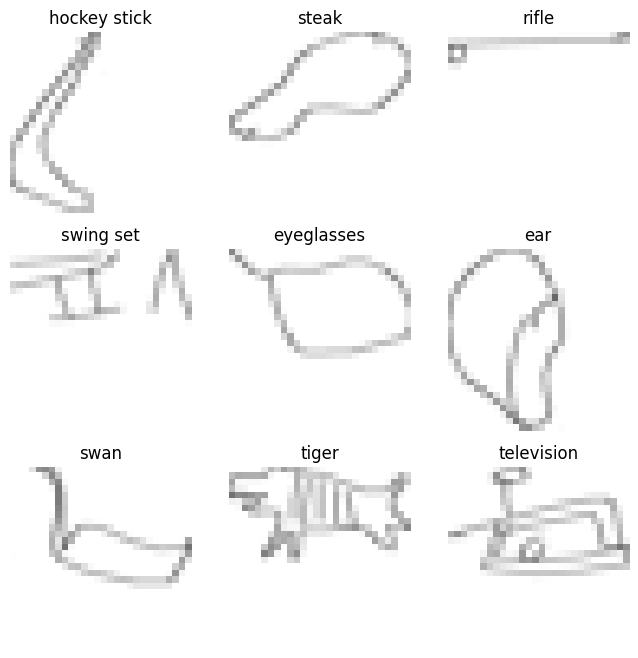

In [6]:
plt.figure(figsize=(8, 8))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        data = images[i].numpy().astype("uint8")
        plt.imshow(data, cmap='gray', vmin=0, vmax=255)
        plt.title(train_ds.class_names[labels[i]])
        plt.axis("off")

In [7]:
input_shape = (28, 28, 1)
n_classes = 345

model = Sequential([
    Rescaling(1. / 255, input_shape=input_shape),
    BatchNormalization(),

    Conv2D(6, kernel_size=(3, 3), padding="same", activation="relu"),
    Conv2D(8, kernel_size=(3, 3), padding="same", activation="relu"),
    Conv2D(10, kernel_size=(3, 3), padding="same", activation="relu"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),

    Dense(700, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(500, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(400, activation='relu'),
    Dropout(0.2),

    Dense(n_classes, activation='softmax')
])

model.compile(
    optimizer="adam",
    loss=SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)

model.summary()

C:\GitHub\quickdraw-cnn\cnn\venv\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 28, 28, 1)           │               4 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 28, 28, 6)           │              60 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 8)           │             440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 10)          │             730 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 28, 28, 10)          │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1960)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 700)                 │       1,372,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 700)                 │           2,800 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 700)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 500)                 │         350,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 500)                 │           2,000 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 400)                 │         200,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 345)                 │         138,345 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,068,019 (7.89 MB)

 Trainable params: 2,065,597 (7.88 MB)

 Non-trainable params: 2,422 (9.46 KB)

In [11]:
epochs = 14

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = TensorBoard(logdir, histogram_freq=1)

model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    verbose=1,
    callbacks=[tensorboard_callback]
)

model.save('./models/model_' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + '.keras')

Epoch 1/14
10350/10350 ━━━━━━━━━━━━━━━━━━━━ 236s 23ms/step - accuracy: 0.6762 - loss: 1.1269 - val_accuracy: 0.5977 - val_loss: 1.6856
Epoch 2/14
10350/10350 ━━━━━━━━━━━━━━━━━━━━ 241s 23ms/step - accuracy: 0.6761 - loss: 1.1354 - val_accuracy: 0.6056 - val_loss: 1.6300
Epoch 3/14
10350/10350 ━━━━━━━━━━━━━━━━━━━━ 241s 23ms/step - accuracy: 0.6744 - loss: 1.1372 - val_accuracy: 0.6051 - val_loss: 1.6494
Epoch 4/14
10350/10350 ━━━━━━━━━━━━━━━━━━━━ 230s 22ms/step - accuracy: 0.6736 - loss: 1.1393 - val_accuracy: 0.6057 - val_loss: 1.6269
Epoch 5/14
10350/10350 ━━━━━━━━━━━━━━━━━━━━ 235s 23ms/step - accuracy: 0.6752 - loss: 1.1349 - val_accuracy: 0.6045 - val_loss: 1.6625
Epoch 6/14
10350/10350 ━━━━━━━━━━━━━━━━━━━━ 241s 23ms/step - accuracy: 0.6744 - loss: 1.1370 - val_accuracy: 0.6057 - val_loss: 1.6227
Epoch 7/14
10350/10350 ━━━━━━━━━━━━━━━━━━━━ 232s 22ms/step - accuracy: 0.6752 - loss: 1.1322 - val_accuracy: 0.6037 - val_loss: 1.6446
Epoch 8/14
10350/10350 ━━━━━━━━━━━━━━━━━━━━ 224s 22ms/s

In [18]:
# Carregar o modelo Keras salvo
model = tf.keras.models.load_model("models/model_20250303-182956.keras")

# Converter o modelo para TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Salvar o modelo convertido
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\geras\AppData\Local\Temp\tmp43m7gbs5\assets


INFO:tensorflow:Assets written to: C:\Users\geras\AppData\Local\Temp\tmp43m7gbs5\assets


Saved artifact at 'C:\Users\geras\AppData\Local\Temp\tmp43m7gbs5'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 345), dtype=tf.float32, name=None)
Captures:
  1971171375824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1971171375248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1971171376016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1971171368336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1971171374096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1971171373520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1971171374480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1971171372752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1971171373328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1971171371984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  197117

In [19]:
%tensorboard --logdir logs